# Liczba morderst w latach 2014/2015 w poszczególnych miastach USA
Zbior danych zawiera średnią liczbę mordestw za rok 2014 i 2015 we wszystkich miastach USA z conajmniej 250 000 mieszkańcami.
Źródło to:  FBI Uniform Crime Reports.

Zbór danych składa się z nazwy miasta, stanu w którym miasto się znajduje, liczby morderstw w 2014 roku, liczby morderstw w 2015 roku, rożnicy między 2015 i 2014.


Zbiór danych zawiera 83 rekordy.

In [4]:
data <- read.csv(file = 'murder_2015_final.csv')

randomRows = function(df,n){
   return(df[sample(nrow(df),n),])
}
data_proba <- randomRows(data,40)
data_proba

,city,state,X2014_murders,X2015_murders,change
36,Bakersfield,California,17,22,5
16,New York,New York,333,352,19
50,Henderson,Nevada,3,4,1
26,Fort Wayne,Indiana,12,25,13
83,Buffalo,New York,60,41,-19
39,Oakland,California,80,85,5
73,Lincoln,Nebraska,7,1,-6
1,Baltimore,Maryland,211,344,133
76,Mobile,Alabama,31,24,-7
30,Newark,New Jersey,93,104,11


# W pierwszym teście sprawdzimy czy liczba morderst zwiększyła się w roku 2015 zrobimy to za pomocą testu sparowanego na próbie 40 miast

Szerokości przedziałów zabrałem z wbudowanej funkcji R hist() ponieważ są to zbliżone wartości do ręcznie liczonej liczby przedziałów i długości przedziału.

nr.klasy,poczatek.klasy,koniec.klasy,srodek.klasy,liczebnosc.klasy
1,-20,0,-10,16
2,0,20,10,20
3,20,40,30,2
4,40,60,50,1
5,60,80,70,0
6,80,100,90,0
7,100,120,110,0
8,120,140,130,1


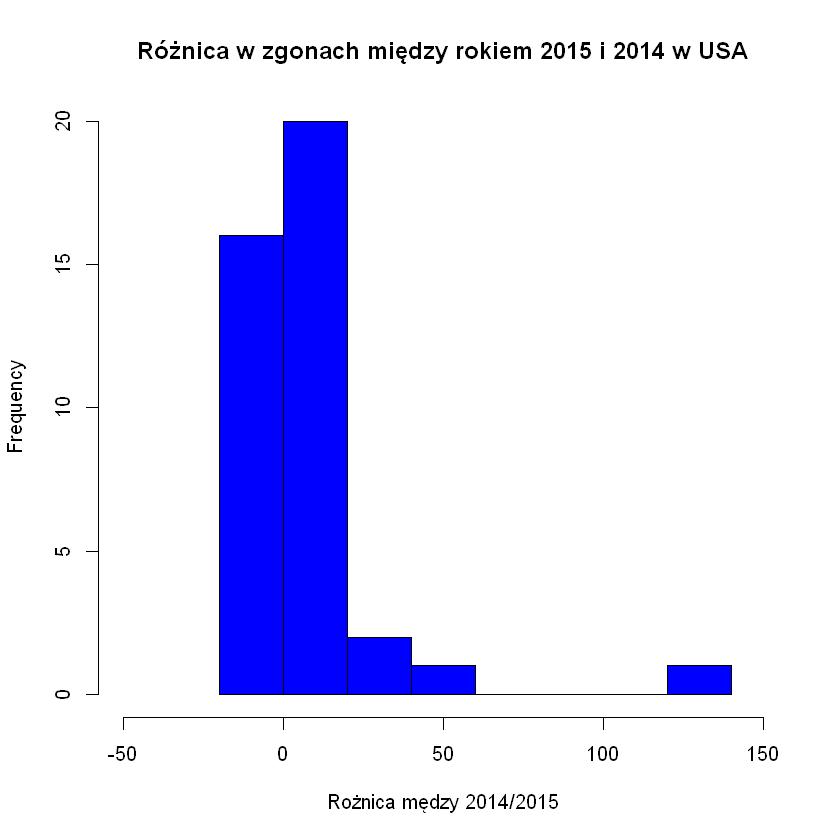

In [5]:
histogram1 <- hist(data_proba$change,col="blue",xlab="Rożnica mędzy 2014/2015",xlim=c(-50,150), main="Różnica w zgonach między rokiem 2015 i 2014 w USA") 
freq.tab <- data.frame(nr.klasy        = seq(1, length(histogram1$counts)),
                       poczatek.klasy  = head(histogram1$breaks,-1),
                       koniec.klasy    = tail(histogram1$breaks,-1),
                       srodek.klasy    = histogram1$mids,
                       liczebnosc.klasy= histogram1$counts)
freq.tab


# Podstawowe Statystyki opisowe

Dla celów poglądowych zaprezentowałem podstawowe statystyki dla 2014 i 2015 rozłącznie jednak nie są one potrzebne do Testu dla prób zależnych.  W tym przypadku porównujemy wyniki pochodzące z różnicy.

In [6]:
print("Dla 2014 roku")
print(c(Srednia=mean(data_proba$X2014_murders), Mediana=median(data_proba$X2014_murders), Wariancja = var(data_proba$X2014_murders), Odchylenie = sd(data_proba$X2014_murders)))
print("Dla 2015 roku")
print(c(Srednia=mean(data_proba$X2015_murders), Mediana=median(data_proba$X2015_murders), Wariancja = var(data_proba$X2015_murders), Odchylenie = sd(data_proba$X2015_murders)))
print('Dla różnicy')
summary(data$change)
print(c(Srednia=mean(data_proba$change), Mediana=median(data_proba$change), Wariancja = var(data_proba$change), Odchylenie = sd(data_proba$change)))

[1] "Dla 2014 roku"
   Srednia    Mediana  Wariancja Odchylenie 
   54.7250    28.0000  4724.8712    68.7377 
[1] "Dla 2015 roku"
   Srednia    Mediana  Wariancja Odchylenie 
  63.05000   30.50000 7000.30513   83.66783 
[1] "Dla różnicy"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.000  -3.000   4.000   9.735  14.000 133.000 

   Srednia    Mediana  Wariancja Odchylenie 
   8.32500    3.00000  586.27628   24.21314 


Dla podstawowych statystyk opisowych różnicy w liczbie morderstw możemy zauważyć, że średnia jest sporo większa od mediany. Przyczyną są wartości skrajne na końcach przedziałów. Potwierdza to odchylenie standardowe, które jest wysokie, a więc wartości są szeroko rozrzucone wokół średniej arytmetycznej. 

# W pierwszym teście chcemy srpawdzić czy liczba mordestw miastach USA zwiększyła się w 2015 względem roku 2014.
Użyjemy tutaj testu dla prób zależnych (sparowanego) jednostornnego.

Hipoteza zerowa: H_0 - liczba morderstw nie zwiększyła się w 2015 roku (u2-u1=0)

Hipoteza alternatywna: H_1- Liczba morderstw zwiększyła się w 2015 roku (u2-u1>0)

Przyjmujemy poziom istotności alfa (prawdopodobieństwo popełnienia błędu I rodzaju): 0,05

In [7]:
alpha <- 0.05
n<- nrow(data_proba)
print('Statystyka Testowa')
Statystyka_T <- (mean(data_proba$change)/sd(data_proba$change))*sqrt(n)
Statystyka_T

print('Wartość krytyczna')
qnorm(1-alpha,0,1)
qt(1-alpha,n-1)
 
print('p-wartość') 
pnorm(-abs(Statystyka_T))


[1] "Statystyka Testowa"


[1] 2.174518

[1] "Wartość krytyczna"


[1] 1.644854

[1] 1.684875

[1] "p-wartość"


[1] 0.01483311

Próba ma licznośc 40 więc stosujemy test Z

Statystyka testowa = 2.17

Obszar ktytyczny (1.64; inf)

Odrzucamy hipoteze H_0 na rzecz hipotezy H_1

p-wartość = 0.0148 < 0.05 a więc p-wartości również potwierdza odrzucenie H_0.

Wynik testu pokazał niestety, że liczba morderstw w miastach USA w 2015 jest większa niz w 2014 roku.

# Analiza regresji liniowej

W tym celu stworzyłem nową kolumne Unemployment_Rates która zawiera stopę bezrobocia dla stanu w którym znajduje się dane miasto na rok 2015. 

In [8]:
#stany<- table(data$state)
#stany
data$Unemployment_Rates <- 0
data$Unemployment_Rates[data$state == 'Alabama'] <- 6.1
data$Unemployment_Rates[data$state == 'Alaska'] <- 6.5
data$Unemployment_Rates[data$state == 'Arizona'] <- 6.1
data$Unemployment_Rates[data$state == 'California'] <- 6.2
data$Unemployment_Rates[data$state == 'Colorado'] <- 3.9
data$Unemployment_Rates[data$state == 'D.C.'] <- 6.9
data$Unemployment_Rates[data$state == 'Florida'] <- 5.5
data$Unemployment_Rates[data$state == 'Georgia'] <- 6.0
data$Unemployment_Rates[data$state == 'Hawaii'] <- 3.6
data$Unemployment_Rates[data$state == 'Illinois'] <- 6.0
data$Unemployment_Rates[data$state == 'Indiana'] <- 4.8
data$Unemployment_Rates[data$state == 'Kansas'] <- 4.2
data$Unemployment_Rates[data$state == 'Kentucky'] <- 5.3
data$Unemployment_Rates[data$state == 'Louisiana'] <- 6.3
data$Unemployment_Rates[data$state == 'Maryland'] <- 5.1
data$Unemployment_Rates[data$state == 'Massachusetts'] <- 4.8
data$Unemployment_Rates[data$state == 'Michigan'] <- 5.4
data$Unemployment_Rates[data$state == 'Minnesota'] <- 3.7
data$Unemployment_Rates[data$state == 'Missouri'] <- 5.0
data$Unemployment_Rates[data$state == 'Nebraska'] <- 3.0
data$Unemployment_Rates[data$state == 'Nevada'] <- 6.7
data$Unemployment_Rates[data$state == 'New Jersey'] <- 5.8
data$Unemployment_Rates[data$state == 'New Mexico'] <- 6.5
data$Unemployment_Rates[data$state == 'New York'] <- 5.3
data$Unemployment_Rates[data$state == 'North Carolina'] <- 5.7
data$Unemployment_Rates[data$state == 'Ohio'] <- 4.9
data$Unemployment_Rates[data$state == 'Oklahoma'] <- 4.4
data$Unemployment_Rates[data$state == 'Oregon'] <- 5.6
data$Unemployment_Rates[data$state == 'Pennsylvania'] <- 5.3
data$Unemployment_Rates[data$state == 'Tennessee'] <- 5.6
data$Unemployment_Rates[data$state == 'Texas'] <- 4.4
data$Unemployment_Rates[data$state == 'Virginia'] <- 4.5
data$Unemployment_Rates[data$state == 'Washington'] <- 5.6
data$Unemployment_Rates[data$state == 'Wisconsin'] <- 4.5

data





city,state,X2014_murders,X2015_murders,change,Unemployment_Rates
Baltimore,Maryland,211,344,133,5.1
Chicago,Illinois,411,478,67,6.0
Houston,Texas,242,303,61,4.4
Cleveland,Ohio,63,120,57,4.9
Washington,D.C.,105,162,57,6.9
Milwaukee,Wisconsin,90,145,55,4.5
Philadelphia,Pennsylvania,248,280,32,5.3
Kansas City,Missouri,78,109,31,5.0
Nashville,Tennessee,41,72,31,5.6
St. Louis,Missouri,159,188,29,5.0


Sprawdzimy czy istnieje zależność między ilością zabójstw a stopą bezrobocia. Sprawdzimy, czy te dwie zmienne są zależne i przeprowadzimy analizę regresji.

Wyznaczamy współczynnik korelacji Pearsona

In [9]:
wspKor <- cor(data$X2015_murders, data$Unemployment_Rates)
wspKor

[1] 0.07303353

Współczynnik korelacji Pearsona wyszedł bardzo niski więc zależność liniowa między zmiennymi jest bardzo niska.

Wykres rozrzutu dla danych.

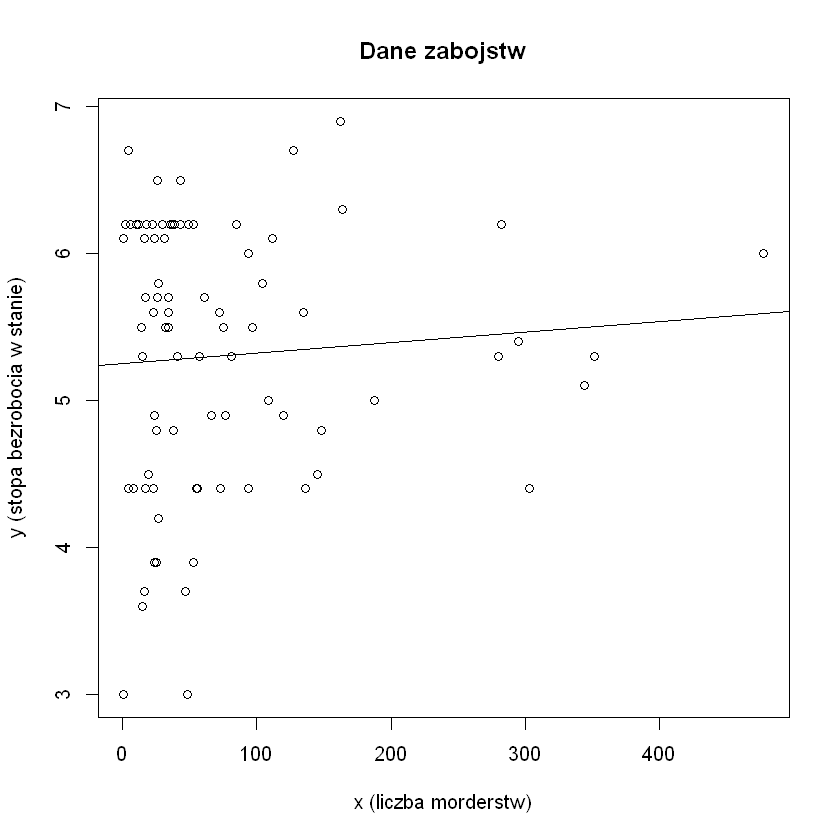

In [10]:
plot(data$Unemployment_Rates ~ data$X2015_murders, main = "Dane zabojstw", xlab = "x (liczba morderstw)", ylab = "y (stopa bezrobocia w stanie)")
model <- lm(Unemployment_Rates~X2015_murders, data)
abline(model)

Sprawdzamy czy wynik jest istotny na na poziomie istotności alfa=0.05


In [11]:
model.summary = summary(model)
F<- model.summary$fstatistic
pValue<- 1- pf(F[1],F[2],F[3])
model.summary
pValue

# Nie jest istotny ponieważ p-wartość= 0.512 (0.512>0.05)



Call:
lm(formula = Unemployment_Rates ~ X2015_murders, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2863 -0.8553  0.1943  0.8421  1.5318 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2518010  0.1289775  40.719   <2e-16 ***
X2015_murders 0.0007184  0.0010900   0.659    0.512    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9049 on 81 degrees of freedom
Multiple R-squared:  0.005334,	Adjusted R-squared:  -0.006946 
F-statistic: 0.4344 on 1 and 81 DF,  p-value: 0.5117


value 
0.5117254

Nie ma zależności liniowej między morderstwami a stopą bezrobocia w dużych miastach USA w 2015 roku.

# Sprawdźmy liniową zależność między liczbą morderstw w USA na przestrzeni dwóch lat

Wyznaczamy współczynnik korelacji Pearsona

In [12]:
wspKor1 <- cor(data$X2015_murders, data$X2014_murders)
wspKor1

[1] 0.9781062

Jak widać współczynnik korelacji Pearsona jest obiecujący (zależność liniowa między zmiennymi jest bardzo wysoka).

Wykres rozrzutu danych.

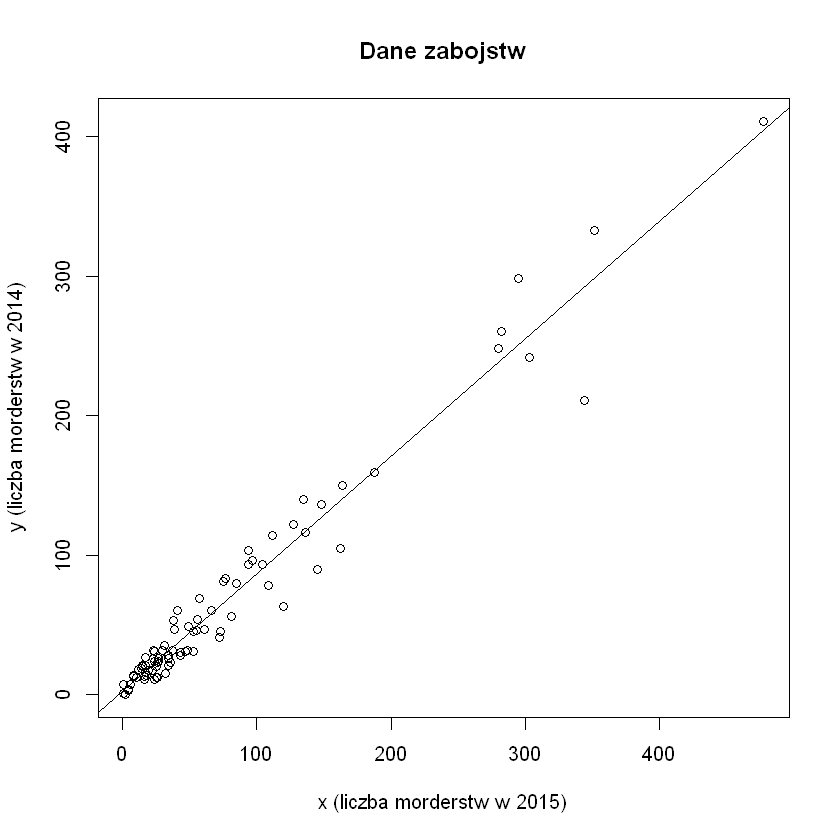

In [13]:
plot(data$X2014_murders ~ data$X2015_murders, main = "Dane zabojstw", xlab = "x (liczba morderstw w 2015)", ylab = "y (liczba morderstw w 2014)")
model1 <- lm(X2014_murders~X2015_murders, data)
abline(model1)

Sprawdzamy czy wynik jest istotny na na poziomie istotności alfa=0.05


In [14]:
model1.summary = summary(model1)
F<- model1.summary$fstatistic
pValue1<- 1- pf(F[1],F[2],F[3])
model1.summary
pValue1




Call:
lm(formula = X2014_murders ~ X2015_murders, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.083  -5.661  -0.180   7.697  47.220 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.12269    2.35795     0.9    0.371    
X2015_murders  0.84291    0.01993    42.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.54 on 81 degrees of freedom
Multiple R-squared:  0.9567,	Adjusted R-squared:  0.9562 
F-statistic:  1789 on 1 and 81 DF,  p-value: < 2.2e-16


value 
    0

Model jest istotny statystycznie na poziomie alfa=0.05 (p-wartość statystyki F < 2.2e-16)

 # Wykres rozrzutu danych prowadzi mnie do wniosku, że występuje tu heteroskedastyczny szum. 

Spróbuję teraz wykonać test Breusch'a–Pagan'a służący do testowania heteroskedastyczności w modelu regresji liniowej. Na poziomie istotności 0,05.

H_0 - homoskedastyczność

H_1 - heteroskedastyczność

In [15]:
score.resid <- model1$residuals^2
murder2 <- data$X2015_murders^2
murder <- data$X2015_murders

Test_BP <- lm(score.resid ~ murder+murder2)
summary(Test_BP)


Call:
lm(formula = score.resid ~ murder + murder2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1640.4  -155.7     0.2    87.7  5194.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.139e+02  1.285e+02  -0.886   0.3782  
murder       5.873e+00  2.418e+00   2.429   0.0174 *
murder2     -4.454e-03  6.364e-03  -0.700   0.4861  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 693.1 on 80 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2325 
F-statistic: 13.42 on 2 and 80 DF,  p-value: 9.416e-06


p-wartość: 9.416e-06 < 0.05 a więc odrzucamy H_0 na rzecz H_1.

A więc nasz ciąg danych posiada własność heteroskedastycznośći (tzn. przynajmniej jedna zmienna losowa z ciągu różni się od innych wariancją lub jej wariancja jest nieskończona).